# Symbolic Defaults

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from output_parser import parse_console_output
results = parse_console_output("D:\\data/symb_def_svc_100_20_prog.txt")

The following plots show the internal fitness score. The internal fitness score is the average of scores predicted by the surrogate model across all tasks except the indicated one.

In [7]:
print(len(results))

94


In [25]:
len(result.information_by_generation)

100

In [45]:
def plot_result(result, ax):    
    max_score_per_gen = [float(gen.score_max) for gen in result.information_by_generation]
    ax.plot(range(result.n_generations_elapsed), max_score_per_gen)
    ax.set_ylim([0.75, 1.])
    ax.set_xlim([0, 100])
    ax.set_title(result.task)

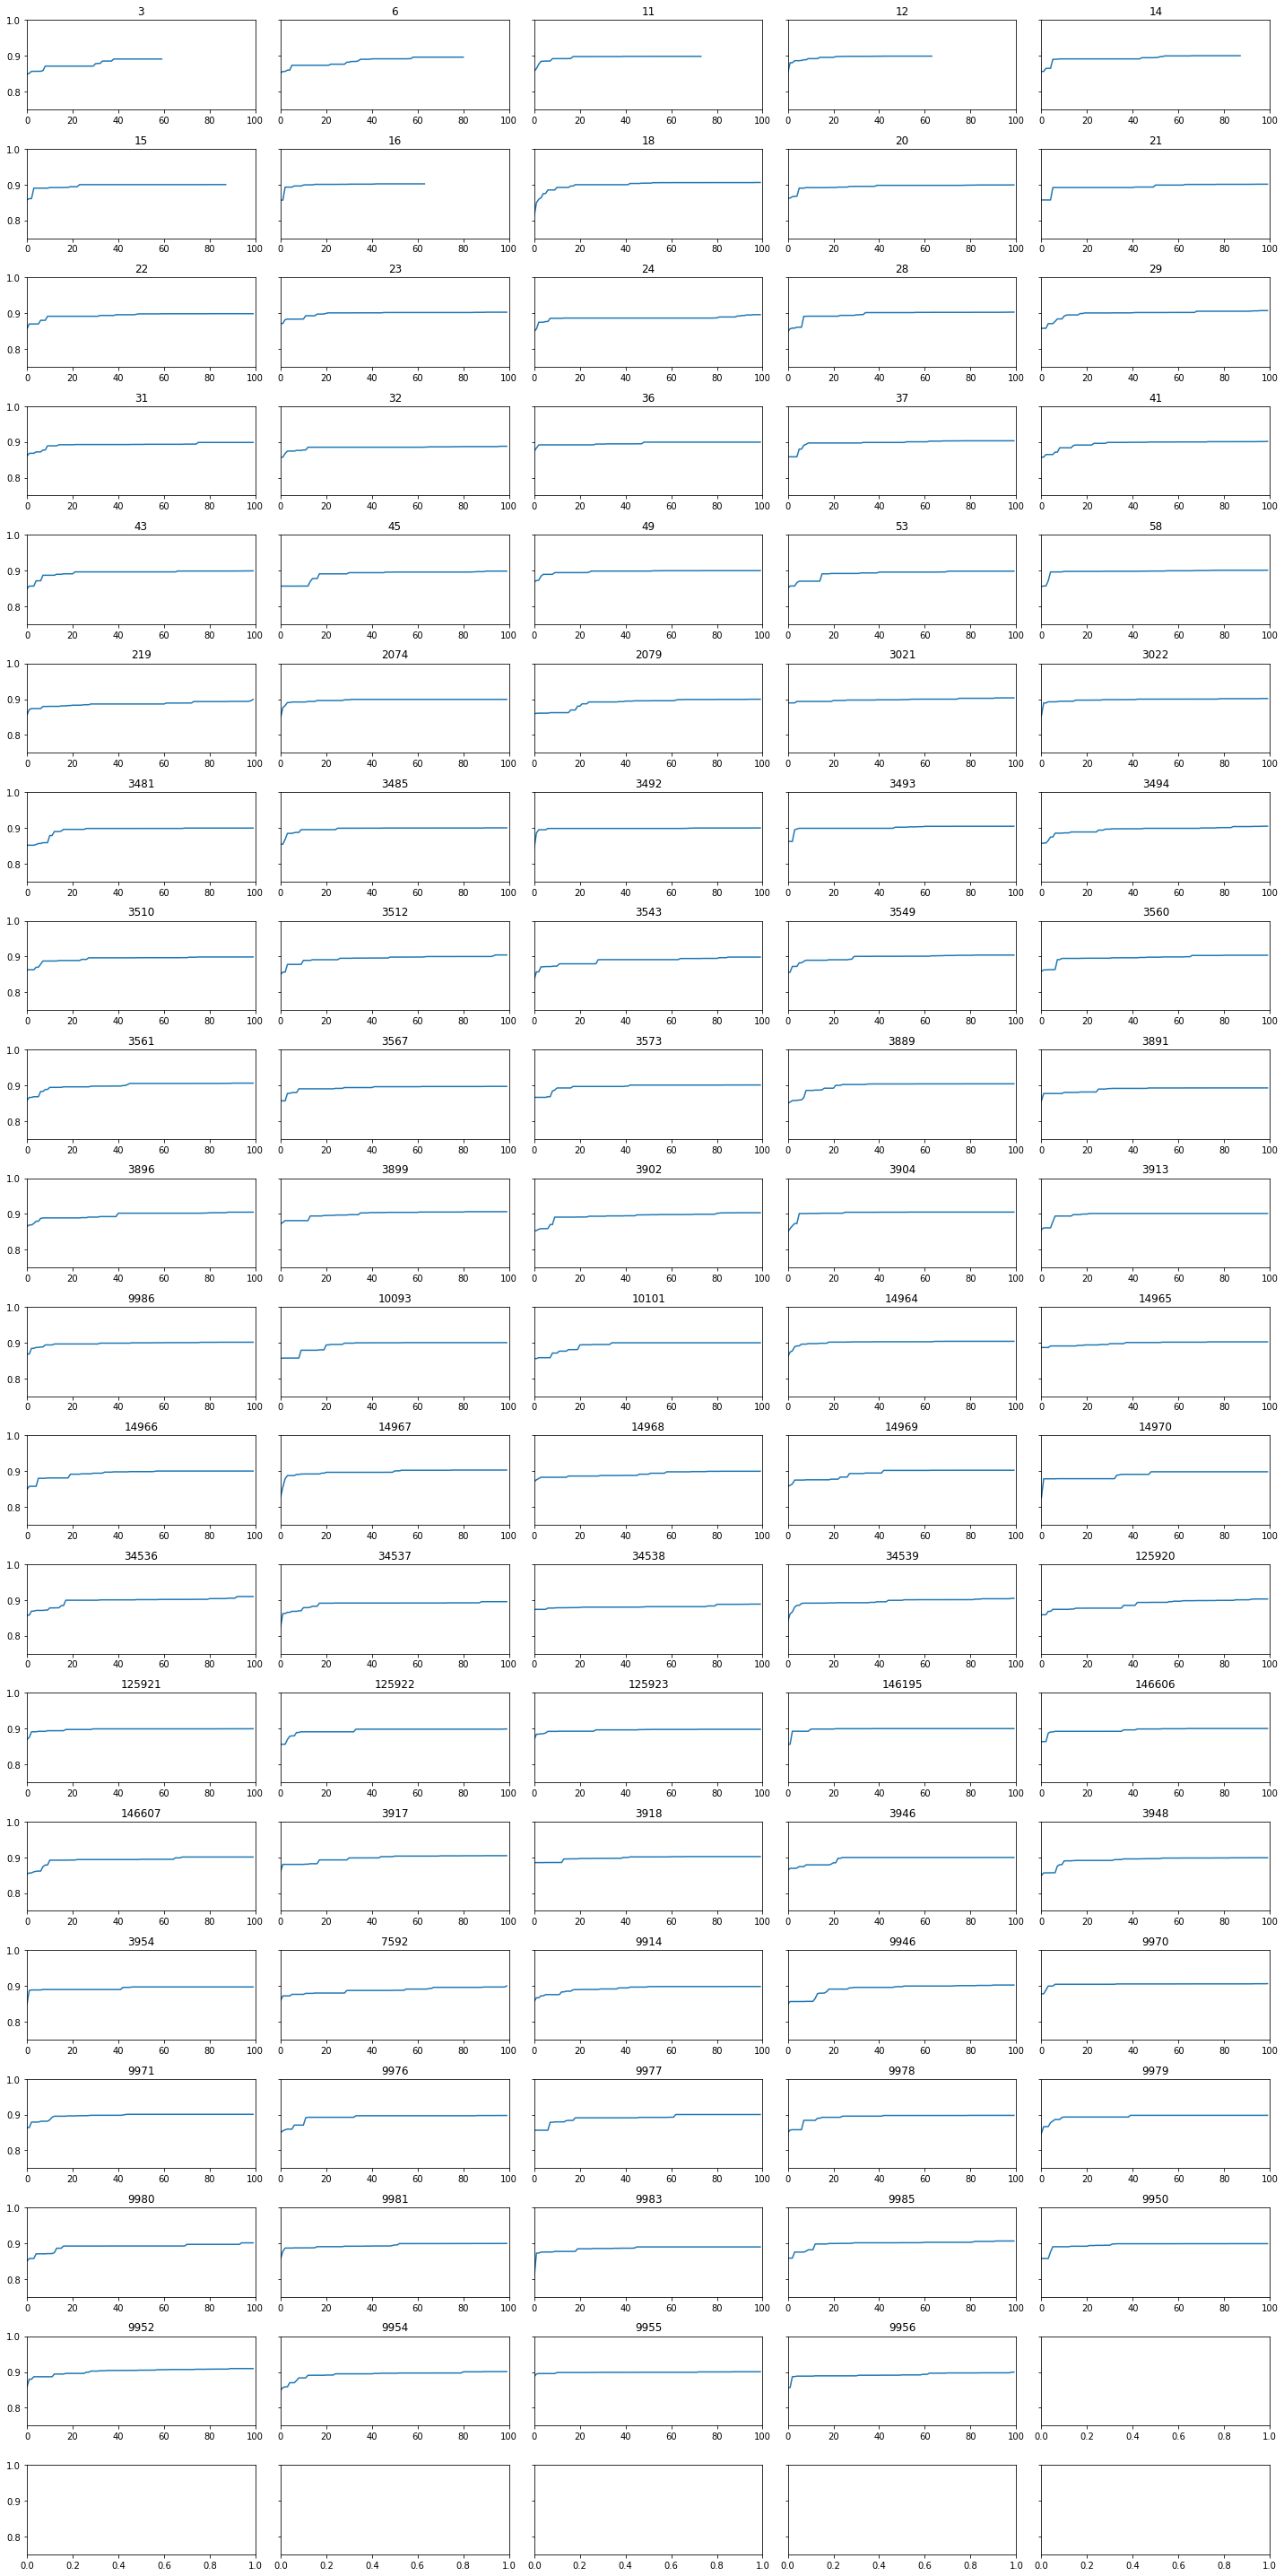

In [46]:
n_rows, n_cols = 20, 5
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 40), sharey=True)
for i, result in enumerate(results):
    ax = axes[i//n_cols, i % n_cols]
    plot_result(result, ax)
fig.tight_layout()

In [16]:
axes.shape

(20, 5)

The top scoring expressions per task. Overall:

In [5]:
for result in results:
    print(result.task, result.top_five_expressions[0])

3 p, truediv(mkd, 4.0)
6 32.0, truediv(mkd, 4.0)
11 truediv(p, mcp), mul(0.22741145537539598, mkd)
12 add(truediv(n, p), p), mul(mkd, 0.22511679513073424)
14 truediv(10.0, mcp), mul(mkd, 0.23213547632124398)
15 128.0, truediv(mkd, 4.0)
16 mul(add(8.0, mul(4.0, 4.0)), m), mul(0.23107794139992588, mkd)
18 sub(sub(128.0, expit(128.0)), mul(mul(128.0, mcp), mcp)), mul(add(0.00390625, 0.2227244515510528), mkd)
20 pow(add(add(64.0, add(64.0, m)), m), expit(p)), truediv(mkd, 5.0)
21 add(m, mul(m, 10.0)), mul(mkd, 0.25)
22 mul(64.0, 0.8788816065809125), mul(mkd, 0.25)
23 128.0, truediv(mkd, add(add(0.41163256861675235, rc), add(rc, 4.0)))
24 truediv(n, 8.0), truediv(mkd, 5.0)
28 add(add(truediv(n, add(p, m)), add(m, mkd)), m), mul(0.2257766546491321, mkd)
29 128.0, truediv(mkd, add(truediv(rc, mul(mcp, mkd)), 4.0))
31 truediv(p, mcp), mul(mkd, 0.2487665327858929)
32 mul(n, mul(sub(m, mul(0.9531655474022283, mcp)), mkd)), mul(0.0025292618482459783, 0.6258857694987314)
36 64.0, mul(0.23290664385

Expressions in the pareto-front with the least amount of operators:

In [6]:
for result in results:
    _, expr = min([(len(expr.split('(')), expr) for expr in result.top_five_expressions])
    print(result.task, expr)

3 p, truediv(mkd, 3.0)
6 16.0, truediv(mkd, 3.0)
11 truediv(p, mcp), mul(0.22426512543927812, mkd)
12 add(truediv(n, p), 1.0), mul(mkd, 0.22511679513073424)
14 truediv(10.0, mcp), mul(mkd, 0.23213547632124398)
15 128.0, truediv(mkd, 4.0)
16 mul(add(8.0, m), m), mul(0.23107794139992588, mkd)
18 sub(sub(128.0, expit(128.0)), mul(mul(128.0, mcp), mcp)), mul(add(0.00390625, 0.2227244515510528), mkd)
20 add(add(add(64.0, add(64.0, m)), m), expit(64.0)), truediv(mkd, 5.0)
21 add(m, mul(m, 10.0)), mul(mkd, 0.25)
22 add(64.0, 0.8788816065809125), mul(mkd, 0.25)
23 128.0, truediv(mkd, add(0.41163256861675235, add(rc, 4.0)))
24 truediv(n, 8.0), truediv(mkd, 5.0)
28 add(truediv(n, add(p, m)), add(m, 0.125)), mul(0.2257766546491321, mkd)
29 128.0, truediv(mkd, add(truediv(rc, mul(mcp, mkd)), 4.0))
31 truediv(7.0, mcp), mul(mkd, 0.2487665327858929)
32 mul(n, mul(sub(m, 0.6258857694987314), mkd)), 0.0025292618482459783
36 64.0, mul(0.2329066438598818, mkd)
37 add(128.0, 16.0), truediv(mkd, add(pow(m